In [1]:
!pip install ucimlrepo
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metodología CRISP-DM:
## 1 Definición de la minería de datos
El dataset utilizado: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset
Objetivo: Obtener información sobre los datos de uso de la red de infraestructura de la teleco iraní

Exploración de los datos:

#

In [3]:
# fetch dataset
iranian_churn = fetch_ucirepo(id=563)

# data (as pandas dataframes)
X = iranian_churn.data.features
y = iranian_churn.data.targets

# metadata
print(iranian_churn.metadata)

# variable information
print(iranian_churn.variables)

{'uci_id': 563, 'name': 'Iranian Churn', 'repository_url': 'https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/563/data.csv', 'abstract': "This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months.", 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 3150, 'num_features': 13, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Churn'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5JW3Z', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attribu

In [4]:
X.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805


In [5]:
X.count()

Call  Failure              3150
Complains                  3150
Subscription  Length       3150
Charge  Amount             3150
Seconds of Use             3150
Frequency of use           3150
Frequency of SMS           3150
Distinct Called Numbers    3150
Age Group                  3150
Tariff Plan                3150
Status                     3150
Age                        3150
Customer Value             3150
dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 320.1 KB


TypeError: Axes.scatter() missing 1 required positional argument: 'y'

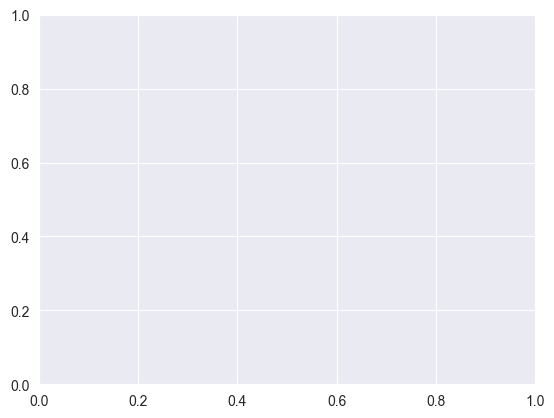

In [7]:
fig,ax =  plt.subplots()
ax.scatter(X,)

### Visualization in IDE

Create graphs and visualizations that match your chosen color scheme.

In [48]:
#expansion
dumies = pd.get_dummies(X['Complains'])
# del dumies[dumies.columns[-1]]
eeee=pd.concat([X,dumies.rename(columns=lambda x: 'Complains_' + str(x))], axis=1)
# del eeee['Complains']
cositas = eeee
cositas.T


,0,1,2,3,4,5,6,7,8,9,...,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149
Call Failure,8,0,10,10,3,11,4,13,7,7,...,16,5,15,7,7,21,17,13,7,8
Complains,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Subscription Length,38,39,37,38,38,38,38,37,38,38,...,29,28,27,27,20,19,17,18,11,11
Charge Amount,0,0,0,0,0,1,0,2,0,1,...,0,0,1,1,1,2,1,4,2,2
Seconds of Use,4370,318,2453,4198,2393,3775,2360,9115,13773,4515,...,1005,1130,1530,3530,2000,6697,9237,3157,4695,1792
Frequency of use,71,5,60,66,58,82,39,121,169,83,...,31,16,38,67,32,147,177,51,46,25
Frequency of SMS,5,7,359,1,2,32,285,144,0,2,...,17,28,26,15,35,92,80,38,222,7
Distinct Called Numbers,17,4,24,35,33,28,18,43,44,25,...,9,5,15,25,16,44,42,21,12,9
Age Group,3,2,3,1,1,3,3,3,3,3,...,3,4,2,3,3,2,5,3,3,3
Tariff Plan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


In [68]:
np.transpose(cositas.astype(int))

,0,1,2,3,4,5,6,7,8,9,...,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149
Call Failure,8,0,10,10,3,11,4,13,7,7,...,16,5,15,7,7,21,17,13,7,8
Complains,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Subscription Length,38,39,37,38,38,38,38,37,38,38,...,29,28,27,27,20,19,17,18,11,11
Charge Amount,0,0,0,0,0,1,0,2,0,1,...,0,0,1,1,1,2,1,4,2,2
Seconds of Use,4370,318,2453,4198,2393,3775,2360,9115,13773,4515,...,1005,1130,1530,3530,2000,6697,9237,3157,4695,1792
Frequency of use,71,5,60,66,58,82,39,121,169,83,...,31,16,38,67,32,147,177,51,46,25
Frequency of SMS,5,7,359,1,2,32,285,144,0,2,...,17,28,26,15,35,92,80,38,222,7
Distinct Called Numbers,17,4,24,35,33,28,18,43,44,25,...,9,5,15,25,16,44,42,21,12,9
Age Group,3,2,3,1,1,3,3,3,3,3,...,3,4,2,3,3,2,5,3,3,3
Tariff Plan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


In [74]:
np.corrcoef(np.transpose(cositas.astype(int)))

array([[ 1.        ,  0.15287875,  0.16973727,  0.58902801,  0.50160659,
         0.57334936, -0.02228238,  0.50405774,  0.05040629,  0.19228547,
        -0.11464455,  0.04175765,  0.12117787, -0.15287875,  0.15287875],
       [ 0.15287875,  1.        , -0.02028569, -0.03394765, -0.10495178,
        -0.09077422, -0.11163256, -0.05819935,  0.01997594,  0.00113962,
         0.27140525,  0.00329802, -0.13288223, -1.        ,  1.        ],
       [ 0.16973727, -0.02028569,  1.        ,  0.07878935,  0.12461763,
         0.10653394,  0.07631777,  0.09200897,  0.02145335, -0.15967975,
         0.14284089, -0.0024297 ,  0.10956303,  0.02028569, -0.02028569],
       [ 0.58902801, -0.03394765,  0.07878935,  1.        ,  0.44673835,
         0.37909589,  0.09153336,  0.4151979 ,  0.27967884,  0.32423241,
        -0.35626867,  0.27895523,  0.16940371,  0.03394765, -0.03394765],
       [ 0.50160659, -0.10495178,  0.12461763,  0.44673835,  1.        ,
         0.94648923,  0.10212319,  0.6765363 , 

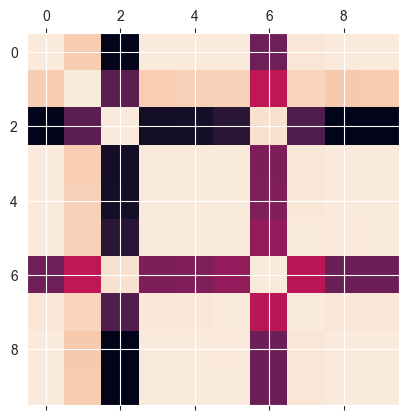

In [96]:
corr = np.corrcoef(cositas.astype(int), rowvar=True)
plt.matshow(corr[:10, :10])
plt.show()